## Rather than re-import the data, import once and then augment 

In [88]:
%matplotlib inline
import numpy as np
import pandas as pd

from scipy import misc
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Dropout, Flatten, ConvLSTM2D, BatchNormalization
from keras import optimizers
from keras.models import load_model

from image_fetch import Image_Fetcher

In [44]:
ideal_bottom = 240
ideal_top = 320
height = ideal_top - ideal_bottom 
margin = 20
steps = 10

In [66]:
bottoms = [x + (ideal_bottom-margin) for x in range(0, margin*2 + steps, steps)]
tops    = [x + (ideal_top   -margin) for x in range(0, margin*2 + steps, steps)]
ranges = list(zip(bottoms, tops))
ranges

[(220, 300), (230, 310), (240, 320), (250, 330), (260, 340)]

In [67]:
ranges

[(220, 300), (230, 310), (240, 320), (250, 330), (260, 340)]

220 300


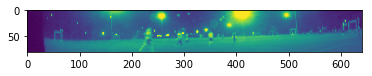

230 310


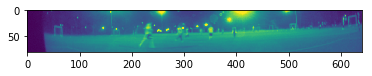

240 320


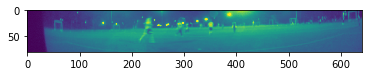

250 330


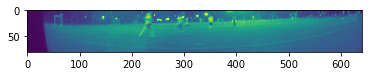

260 340


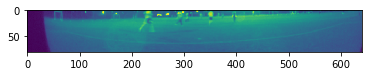

In [68]:
for l,h in ranges:
    print(l,h)
    Image_Fetcher('data/images/capture/', 'data/labels/rugby_image_labels_2.csv', [l,h])

In [48]:
full_crop = [ideal_bottom - margin, ideal_top + margin]
full_crop

[220, 340]

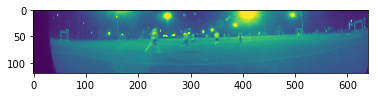

In [49]:
full_image_fetcher = Image_Fetcher('data/images/capture/', 'data/labels/rugby_image_labels_2.csv', full_crop)

In [50]:
x, y = full_image_fetcher.get_all_images_with_labels(msg=False)

0
0
100
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800


220 300


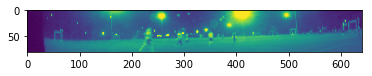

0
0
100
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
(2804, 2, 16, 50) (2804,)
230 310


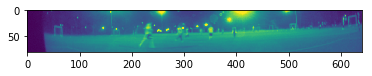

0
0
100
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
(2804, 2, 16, 50) (2804,)
240 320


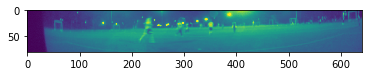

0
0
100
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
(2804, 2, 16, 50) (2804,)
250 330


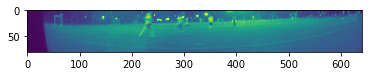

0
0
100
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
(2804, 2, 16, 50) (2804,)
260 340


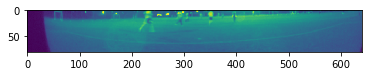

0
0
100
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
(2804, 2, 16, 50) (2804,)


In [115]:
all_x = None
all_y = None 

for l,h in ranges:
    print(l,h)
    full_image_fetcher = Image_Fetcher('data/images/capture/', 'data/labels/rugby_image_labels_2.csv', [l,h])
    x, y = full_image_fetcher.get_all_images_with_labels(msg=False)
    chron_X, chron_y = Image_Fetcher.time_stack_data(x, y, time_frames=2)
    
    if all_x is None:
        all_x = chron_X
        all_y = chron_y
    else:
        all_x = np.concatenate([all_x, chron_X])
        all_y = np.concatenate([all_y, chron_y])

220 300


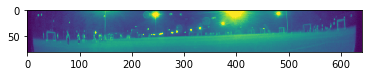

0
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
(2513, 2, 16, 50) (2513,)
230 310


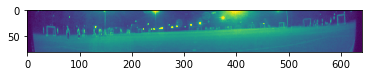

0
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
(2513, 2, 16, 50) (2513,)
240 320


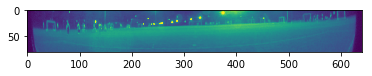

0
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
(2513, 2, 16, 50) (2513,)
250 330


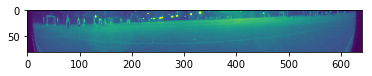

0
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
(2513, 2, 16, 50) (2513,)
260 340


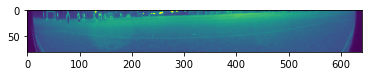

0
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
(2513, 2, 16, 50) (2513,)


In [116]:
for l,h in ranges:
    print(l,h)
    full_image_fetcher = Image_Fetcher('data/images/capture clean/', 'data/labels/rugby_image_labels.csv', [l,h])
    x, y = full_image_fetcher.get_all_images_with_labels(msg=False)
    chron_X, chron_y = Image_Fetcher.time_stack_data(x, y, time_frames=2)
    
    if all_x is None:
        all_x = chron_X
        all_y = chron_y
    else:
        all_x = np.concatenate([all_x, chron_X])
        all_y = np.concatenate([all_y, chron_y])

In [98]:
all_x.shape

(28040, 2, 16, 50)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(
    all_x, all_y, test_size=0.33, random_state=42)

In [86]:
def add_1(arr, front=False):
    '''
    Becuase keras want a channel dimension
    '''
    if front:
        return arr.reshape([1,*arr.shape])
    return arr.reshape([*arr.shape,1])

In [127]:
import keras

In [128]:
tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)

In [89]:
model = load_model('rcnn.h5')

In [102]:
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['mean_absolute_percentage_error'])

In [129]:
model.fit(add_1(X_train), y_train,
          batch_size=30,
          epochs=5,
          verbose=1,
          validation_data=(add_1(X_test), add_1(y_test)),
          callbacks=[tbCallBack])

Train on 17811 samples, validate on 8774 samples
Epoch 1/5
17811/17811 [==============================] - 93s 5ms/step - loss: 0.0068 - mean_absolute_percentage_error: 16.2263 - val_loss: 0.0070 - val_mean_absolute_percentage_error: 15.6437
Epoch 2/5
17811/17811 [==============================] - 95s 5ms/step - loss: 0.0066 - mean_absolute_percentage_error: 15.9844 - val_loss: 0.0065 - val_mean_absolute_percentage_error: 15.5485
Epoch 3/5
17811/17811 [==============================] - 98s 6ms/step - loss: 0.0064 - mean_absolute_percentage_error: 15.7229 - val_loss: 0.0065 - val_mean_absolute_percentage_error: 15.0161
Epoch 4/5
17811/17811 [==============================] - 96s 5ms/step - loss: 0.0062 - mean_absolute_percentage_error: 15.3625 - val_loss: 0.0065 - val_mean_absolute_percentage_error: 15.3433
Epoch 5/5
17811/17811 [==============================] - 97s 5ms/step - loss: 0.0060 - mean_absolute_percentage_error: 15.2546 - val_loss: 0.0064 - val_mean_absolute_percentage_error:

In [130]:
model.save('rcnn_aug.h5')

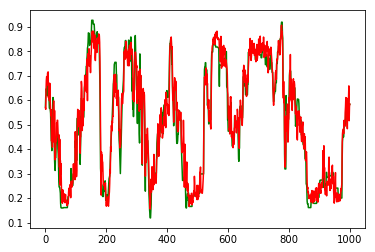

In [132]:
n = 1000

nt = 2804*2



plt.plot(all_y[nt:nt+n], c='g')
plt.plot(model.predict(add_1( all_x[nt:nt+n]) ), c='r')
plt.show()